In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import linregress, pearsonr
from cycler import cycler
import os
import torch


def bland_altman_plot(data1, data2, ax=None, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    if ax==None:
        fig, ax = plt.subplots(nrows=1, ncols=1)

    ax.scatter(mean, diff, *args, **kwargs)
    ax.axhline(md,           color='k', linestyle='--', label="Mean")
    ax.axhline(md + 1.96*sd, color='gray', linestyle='--', label="95% Interval")
    ax.axhline(md - 1.96*sd, color='gray', linestyle='--')


def set_plot_style(style:str="default"):
    if style in ["latex", "ieee", "nature"]:
        if style == "latex":
            plt.rcParams["font.family"] = "serif"
            plt.rcParams['font.serif'] = ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
            plt.rcParams["mathtext.fontset"] = "dejavuserif"
        elif style == "ieee":
            plt.rcParams['axes.prop_cycle']=(cycler('color', ['k', 'r', 'b', 'g']) + cycler('ls', ['-', '--', ':', '-.']))
            plt.rcParams['font.family'] = "serif"
            plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times', 'Palatino', 'Charter', 'serif']
        else:
            plt.rcParams["font.family"] = "sans-serif"
            plt.rcParams['font.sans-serif']= ['DejaVu Sans', 'Arial', 'Helvetica', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Avant Garde', 'sans-serif']
            plt.rcParams["mathtext.fontset"] = "dejavusans"
    
        plt.rcParams["xtick.direction"] = "in"
        plt.rcParams["xtick.major.size"] = 3
        plt.rcParams["xtick.major.width"] = 0.5
        plt.rcParams["xtick.minor.size"] = 1.5
        plt.rcParams["xtick.minor.width"] = 0.5
        plt.rcParams["xtick.minor.visible"] = True
        plt.rcParams["xtick.top"] = True
        plt.rcParams["ytick.direction"] = "in"
        plt.rcParams["ytick.major.size"] = 3
        plt.rcParams["ytick.major.width"] = 0.5
        plt.rcParams["ytick.minor.size"] = 1.5
        plt.rcParams["ytick.minor.width"] = 0.5
        plt.rcParams["ytick.minor.visible"] = True
        plt.rcParams["ytick.right"] = True
    
    elif style == "default":
        plt.rcParams["font.family"] = "sans-serif"
        plt.rcParams['font.sans-serif']= ['DejaVu Sans', 'Arial', 'Helvetica', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Avant Garde', 'sans-serif']
        plt.rcParams['font.serif'] = ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']

        plt.rcParams["xtick.direction"] = "out"
        plt.rcParams["xtick.major.size"] = 3.5
        plt.rcParams["xtick.major.width"] = 0.8
        plt.rcParams["xtick.minor.size"] = 2.0
        plt.rcParams["xtick.minor.width"] = 0.6
        plt.rcParams["xtick.minor.visible"] = False
        plt.rcParams["xtick.top"] = False
        plt.rcParams["ytick.direction"] = "out"
        plt.rcParams["ytick.major.size"] = 3.5
        plt.rcParams["ytick.major.width"] = 0.8
        plt.rcParams["ytick.minor.size"] = 2.0
        plt.rcParams["ytick.minor.width"] = 0.6
        plt.rcParams["ytick.minor.visible"] = False
        plt.rcParams["ytick.right"] = False
    else:
        raise ValueError(f"style must be one of [latex, ieee, nature, default]. Found {style}")

c:\Users\JAVIER\anaconda3\envs\scarnet\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
root = r"C:\Users\JAVIER\OneDrive\Escritorio\ETH\Year 2\Spring 2023\Semester Project\scarnetwork-pytorch\Results"

# path = os.path.join(root, "3D", "2023_05_19_1_epochs500_lr0.0001_unet_multi_bilstm_SD", "volumes") # New labels SD, NOT augment
# path = os.path.join(root, "3D", "2023_05_09_2_epochs500_lr0.0001_SD", "volumes") # Old labels SD, NOT augment
path = os.path.join(root, "3D", "2023_05_26_0_epochs500_lr0.0001_unet_multi_bilstm_SD", "volumes") # Old labels SD, YES augment
# path = os.path.join(root, "3D", "2023_05_18_4_epochs500_lr0.0001_unet_multi_bilstm_FWHM", "volumes") # New labels FWHM, NOT augment
# path = os.path.join(root, "3D", "2023_05_25_9_epochs500_lr0.0001_unet_multi_bilstm_FWHM", "volumes") # New labels FWHM, YES augment

test_multi_bilstm = pd.read_csv(os.path.join(path, "test", "metrics.csv"), index_col=0)
test_multi_bilstm_scores = torch.load(os.path.join(os.path.dirname(path), "test_scores.pt"))

# path = os.path.join(root, "3D", "2023_05_19_0_epochs500_lr0.0001_unet_bilstm_SD", "volumes") # New labels SD, NOT augment
# path = os.path.join(root, "3D", "2023_05_10_2_epochs500_lr0.0001_SD", "volumes") # Old labels SD, NOT augment
path = os.path.join(root, "3D", "2023_05_25_1_epochs500_lr0.0001_unet_bilstm_SD", "volumes") # Old labels SD, YES augment
# path = os.path.join(root, "3D", "2023_05_29_3_epochs500_lr0.0001_unet_bilstm_SD_cv/cv_0", "volumes") # Old labels SD, YES augment
# path = os.path.join(root, "3D", "2023_05_18_3_epochs500_lr0.0001_unet_bilstm_FWHM", "volumes") # New labels FWHM, NOT augment
# path = os.path.join(root, "3D", "2023_05_24_0_epochs500_lr0.0001_unet_bilstm_FWHM", "volumes") # New labels FWHM, YES augment
# path = os.path.join(root, "3D", "2023_05_31_0_epochs500_lr0.0001_unet_bilstm_FWHM_cv/cv_2", "volumes") 

test_bi_lstm = pd.read_csv(os.path.join(path, "test", "metrics.csv"), index_col=0)
# test_bi_lstm_scores = torch.load(os.path.join(os.path.dirname(path), "test_scores.pt"))

# path = os.path.join(root, "2D", "2023_05_19_0_epochs500_lr0.0001_unet_SD", "volumes") # New labels SD, YES augment
# path = os.path.join(root, "2D", "2023_05_25_0_epochs500_lr0.0001_unet_SD", "volumes") # Old labels SD, NO augment
path = os.path.join(root, "2D", "2023_05_09_0_epochs500_lr0.0001_SD", "volumes") # Old labels SD, YES augment
# path = os.path.join(root, "2D", r"2023_05_31_0_epochs500_lr0.0001_unet_SD_cv\cv_4", "volumes") # Old labels SD, YES augment
# path = os.path.join(root, "2D", "2023_05_24_0_epochs500_lr0.0001_unet_FWHM", "volumes") # New labels FWHM, NO augment
# path = os.path.join(root, "2D", "2023_05_18_0_epochs500_lr0.0001_unet_FWHM", "volumes") # New labels FWHM, YES augment
# path = os.path.join(root, "2D", "2023_05_20_0_epochs500_lr0.0001_unet_FWHM_cv/cv_0", "volumes") # New labels FWHM, YES augment


test_unet = pd.read_csv(os.path.join(path, "test", "metrics.csv"), index_col=0)
test_unet_scores = torch.load(os.path.join(os.path.dirname(path), "test_scores.pt"))


combined = pd.concat((test_unet, test_bi_lstm, test_multi_bilstm)).reset_index(drop=True)

In [7]:
test_multi_bilstm.dice_sd2.var()

0.01489986429222144

In [52]:
label = "dice_sd2"
print("2D-UNet: ", pearsonr(test_unet[label], test_unet["scar_ratio_gt"]))
print("BiLSTM: ",pearsonr(test_bi_lstm[label], test_bi_lstm["scar_ratio_gt"]))
print("Multi-BiLSTM: ", pearsonr(test_multi_bilstm[label], test_multi_bilstm["scar_ratio_gt"]))

2D-UNet:  PearsonRResult(statistic=0.3281728958353223, pvalue=0.033856678425664914)
BiLSTM:  PearsonRResult(statistic=0.32380248674880013, pvalue=0.036449456717422835)
Multi-BiLSTM:  PearsonRResult(statistic=0.3250635470731123, pvalue=0.03568515347958758)


In [6]:
import sys
sys.path.append("..")
def get_dice(confusion_matrix, channel):
    TP = torch.sum(confusion_matrix[channel:, channel:])
    FN_FP = torch.sum(confusion_matrix) - torch.sum(confusion_matrix[0:channel,0:channel]) - TP
    dice = (2*TP)/(2*TP + FN_FP)
    return dice
def get_accuracy(cm:torch.Tensor, channel:int):
    return cm[channel:,channel:].sum() / cm[channel:, :].sum()
print("2D-UNet: ",get_accuracy(test_unet_scores, channel=3))
print("BiLSTM: ",get_accuracy(test_bi_lstm_scores, channel=3))
print("Multi-BiLSTM: ",get_accuracy(test_multi_bilstm_scores, channel=3))

2D-UNet:  tensor(nan, device='cuda:0')
BiLSTM:  tensor(nan, device='cuda:0')
Multi-BiLSTM:  tensor(nan, device='cuda:0')


In [104]:
abs(test_multi_bilstm["scar_ratio_gt"] - test_multi_bilstm["scar_ratio_pred"]).max()

0.1864813165665265

In [31]:
combined.columns

Index(['pID', 'dice_myo', 'dice_sd2', 'dice_sd5', 'concomp_myo_pred',
       'concomp_myo_gt', 'concomp_sd2_pred', 'concomp_sd2_gt',
       'concomp_sd5_pred', 'concomp_sd5_gt', 'scar_ratio_pred',
       'scar_ratio_gt', 'scar_ratio_cont_pred', 'scar_ratio_cont_gt',
       'label_cont_pred', 'label_cont_gt', 's2vRatio_myo_pred',
       's2vRatio_myo_gt', 's2vRatio_sd2_pred', 's2vRatio_sd2_gt',
       's2vRatio_sd5_pred', 's2vRatio_sd5_gt', 'network_name'],
      dtype='object')

2D-UNet, Pred:0.1531 ± 0.0753, GT:0.1856 ± 0.0787
BiLSTM, Pred:0.1462 ± 0.0670, GT:0.1856 ± 0.0787
Multi-BiLSTM, Pred:0.1531 ± 0.0685, GT:0.1856 ± 0.0787


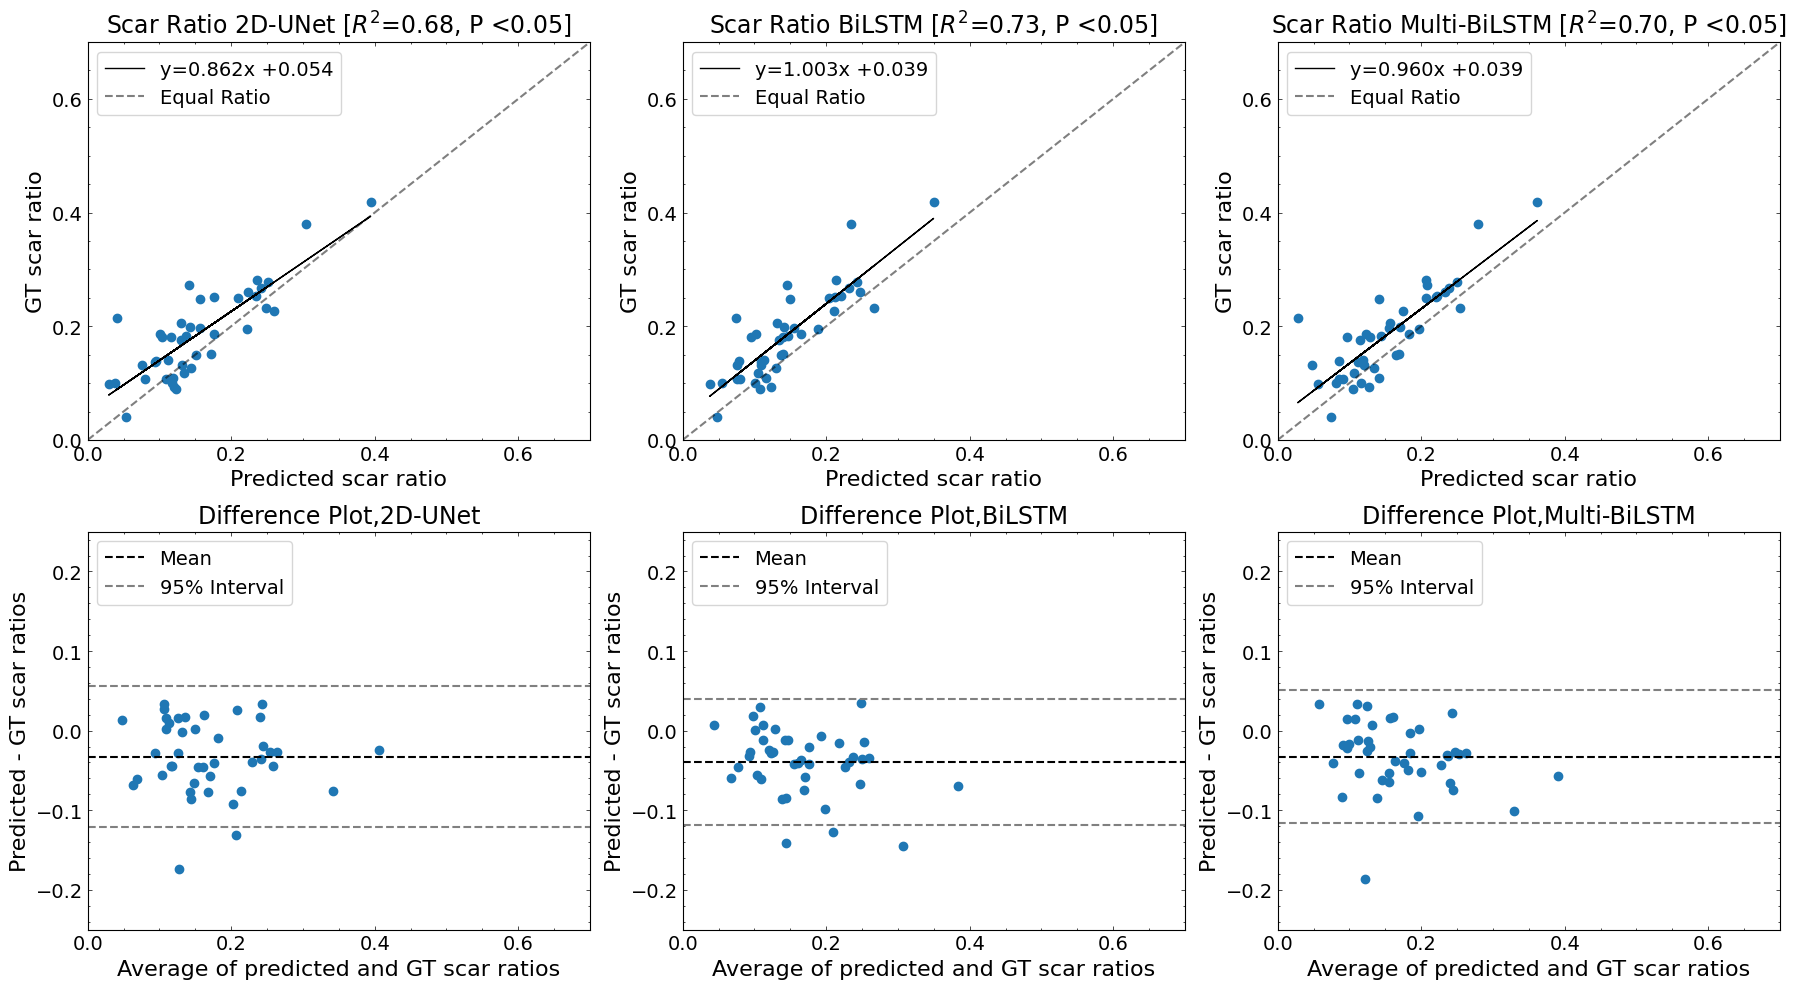

In [29]:
set_plot_style("nature")

factor = 1.
point_sample = 13 * factor
point_mean = 20 * factor
title_font = 17 * factor
axs_font = 16 * factor
ticks_font = 14 * factor
equal = np.linspace(0,1.,100)

fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(18,10))
names = ['unet', 'unet_bilstm', 'unet_multi_bilstm']
good_names = ['2D-UNet', 'BiLSTM', 'Multi-BiLSTM']
col = "scar_ratio_"
lim=[0.0,0.7]
for i in range(3):
    use = combined[combined["network_name"] == names[i]].reset_index(drop=True)
    slope, intercept, r, p, stderr = linregress(use[col+"pred"], use[col+"gt"])
    if p<0.05:
        p = "<0.05"
    else:
        p = ">0.05"
    equal = np.linspace(0,1.,1000)

    axs[0,i].scatter(use[col+"pred"], use[col+"gt"])
    axs[0,i].plot(use[col+"pred"], intercept + slope * use[col+"pred"], color="k", label=f"y={slope:.3f}x +{intercept:.3f}", linewidth=1)
    axs[0,i].plot(equal, equal, linestyle="--", color="k",label="Equal Ratio", alpha=0.5)
    axs[0,i].set_title(f"Scar Ratio {good_names[i]} [$R^2$={r**2:.2f}, P {p}]", fontsize=title_font)
    axs[0,i].set_xlim(lim)
    axs[0,i].set_ylim(lim)
    axs[0,i].set_xlabel("Predicted scar ratio", fontsize=axs_font)
    axs[0,i].set_ylabel("GT scar ratio", fontsize=axs_font)
    axs[0,i].tick_params(labelsize=ticks_font)
    axs[0,i].legend(fontsize=ticks_font, loc="upper left")
    axs[0,i].yaxis.set_major_locator(plt.MaxNLocator(4))
    axs[0,i].xaxis.set_major_locator(plt.MaxNLocator(4))

    bland_altman_plot(use[col+"pred"], use[col+"gt"], ax=axs[1,i])
    axs[1,i].set_ylabel("Predicted - GT scar ratios", fontsize=axs_font)
    axs[1,i].set_xlabel("Average of predicted and GT scar ratios", fontsize=axs_font)
    axs[1,i].set_xlim(lim)
    axs[1,i].set_ylim([-0.25, 0.25])
    axs[1,i].set_title(f"Difference Plot,{good_names[i]}", fontsize=title_font)
    axs[1,i].tick_params(labelsize=ticks_font)
    axs[1,i].legend(fontsize=ticks_font, loc="upper left")
    axs[1,i].yaxis.set_major_locator(plt.MaxNLocator(5))
    axs[1,i].xaxis.set_major_locator(plt.MaxNLocator(4))
    print(f"{good_names[i]}, Pred:{use[col+'pred'].mean():.4f} \u00B1 {use[col+'pred'].std():.4f}, GT:{use[col+'gt'].mean():.4f} \u00B1 {use[col+'gt'].std():.4f}")
plt.tight_layout()
plt.show()


# DICE RESULTS

dice_sd5 across test samples.
          Mean 2D-UNET: 0.521 ± 0.179, best for 14 samples
          Mean BiLSTM-UNET: 0.520 ± 0.167, best for 12 samples
          Mean Multi-BiLSTM-UNET: 0.532 ± 0.167, best for 16 samples


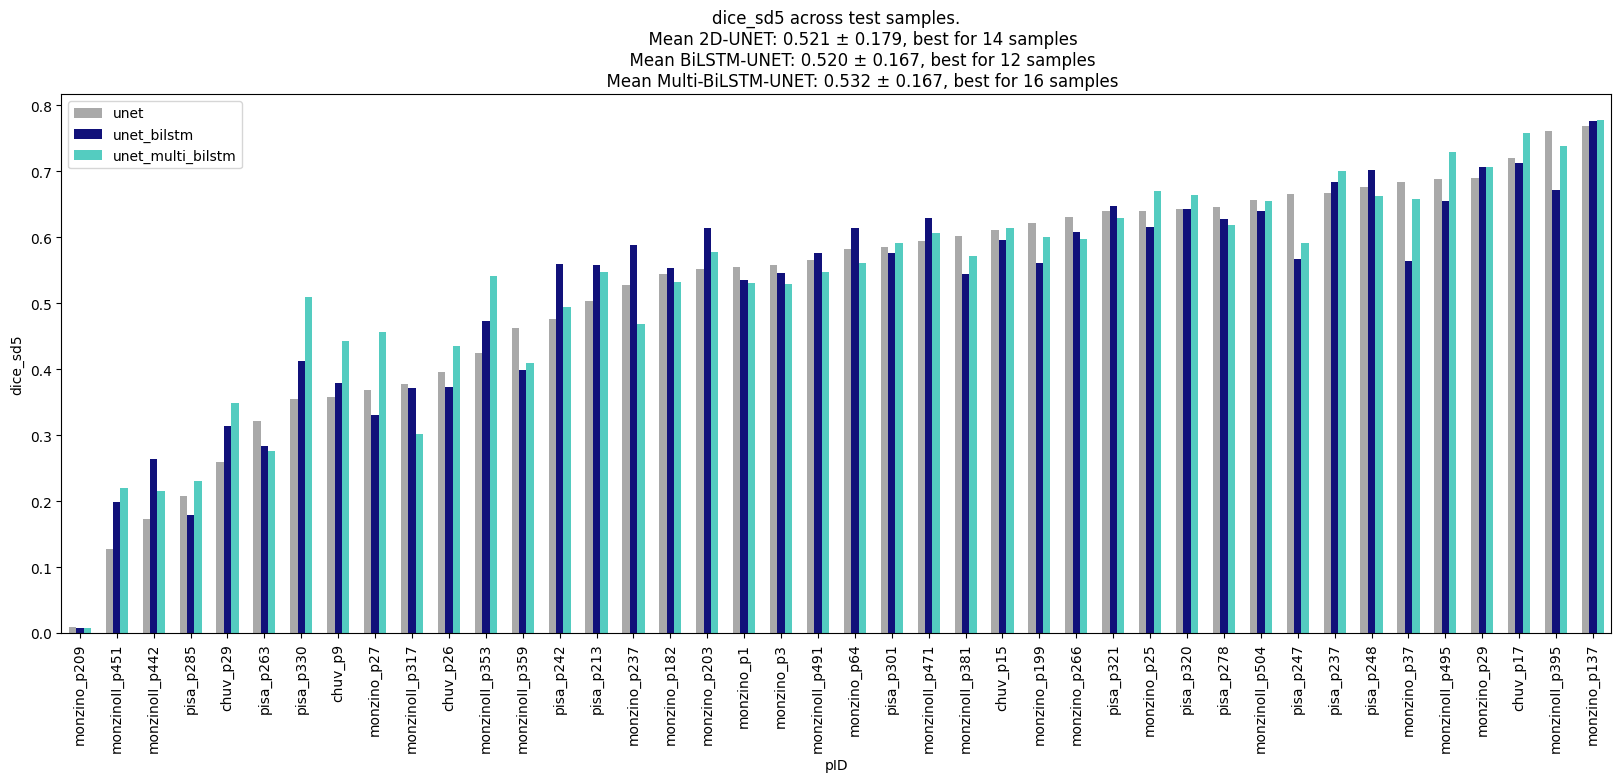

In [8]:
set_plot_style("default")
plt.rcParams["figure.figsize"] = (20,7)
label="dice_sd5"
colors = {"unet":'darkgray',
          "unet_bilstm": 'darkblue',
          "unet_multi_bilstm": 'turquoise'}
# ax=sns.barplot(data=test_bi_lstm, x="pID", y=label, color = 'cornflowerblue', label="BiLSTM", alpha=1.)
# ax=sns.barplot(data=test_multi_bilstm, x="pID", y=label, color = 'midnightblue', label="Multi-BiLSTM", alpha=1.)
# ax=sns.barplot(data=test_unet, x="pID", y=label, color = 'darkgray', label="2D-UNET", alpha=1.)
sns.barplot(data=combined.sort_values(by=["network_name", label]).reset_index(drop=True), x="pID", y=label, hue="network_name", palette=colors, width=0.6)
multi = 0
unet = 0
lstm = 0
for i, pat in enumerate(combined.pID.unique()):
    combined_red = combined[combined.pID == pat].reset_index(drop=True)
    index = combined_red.index[combined_red[label]==combined_red[label].max()][0]
    if combined_red.loc[index, "network_name"] == "unet_multi_bilstm":
        multi += 1
    elif combined_red.loc[index, "network_name"] == "unet":
        unet += 1
    else:
        lstm += 1

plt.title(f"{label} across test samples.\n\
          Mean 2D-UNET: {test_unet[label].mean():.3f} \u00B1 {test_unet[label].std():.3f}, best for {unet} samples\n\
          Mean BiLSTM-UNET: {test_bi_lstm[label].mean():.3f} \u00B1 {test_bi_lstm[label].std():.3f}, best for {lstm} samples\n\
          Mean Multi-BiLSTM-UNET: {test_multi_bilstm[label].mean():.3f} \u00B1 {test_multi_bilstm[label].std():.3f}, best for {multi} samples")

plt.xticks(rotation = 90);
plt.legend()
print(f"{label} across test samples.\n\
          Mean 2D-UNET: {test_unet[label].mean():.3f} \u00B1 {test_unet[label].std():.3f}, best for {unet} samples\n\
          Mean BiLSTM-UNET: {test_bi_lstm[label].mean():.3f} \u00B1 {test_bi_lstm[label].std():.3f}, best for {lstm} samples\n\
          Mean Multi-BiLSTM-UNET: {test_multi_bilstm[label].mean():.3f} \u00B1 {test_multi_bilstm[label].std():.3f}, best for {multi} samples")


In [12]:
test_unet.scar_ratio_gt.mean()

0.34668673089405827

In [2]:
worst = combined[combined.pID=="monzinoII_p203"]
worst

NameError: name 'combined' is not defined

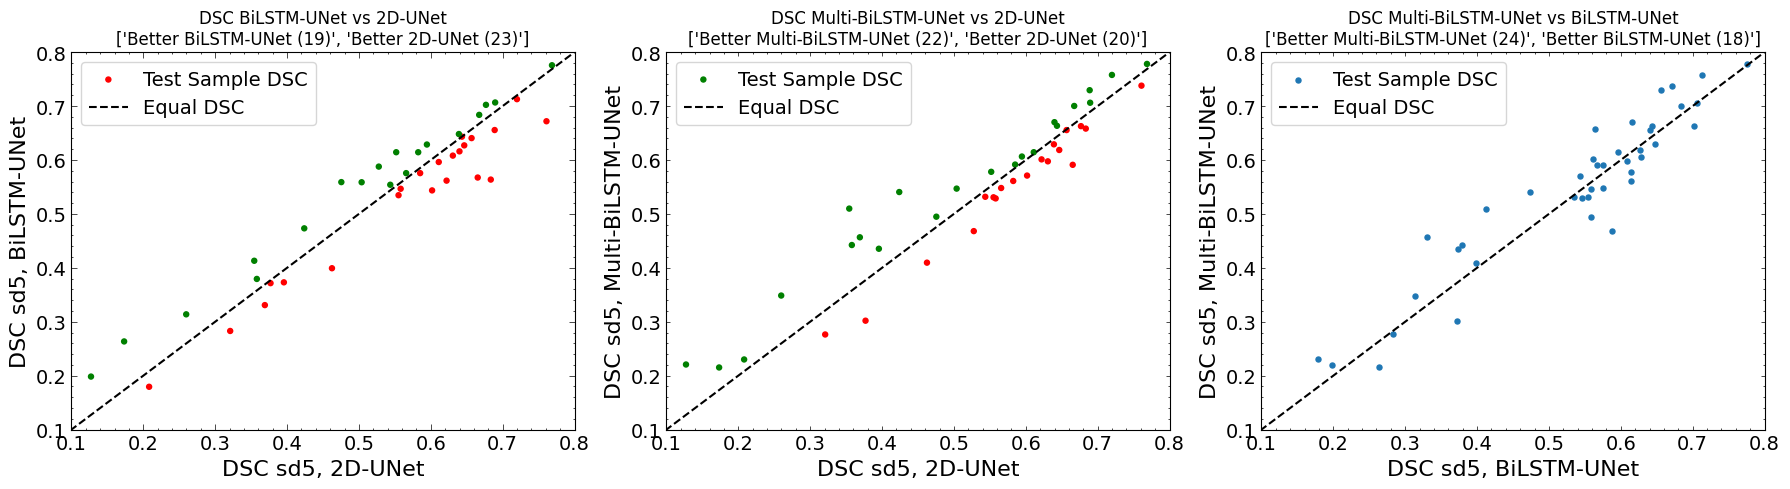

In [11]:
set_plot_style("nature")
lim=[0.1,0.8]
label="dice_sd5"

factor = 1.
point_sample = 13 * factor
point_mean = 20 * factor
title_font = 12 * factor
axs_font = 16 * factor
ticks_font = 14 * factor
equal = np.linspace(0,1.,100)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18*factor,5*factor))


better,worse = 0,0
colors =[]
for i in range(len(test_unet)):
    colors.append("green" if test_unet[label][i] < test_bi_lstm[label][i] else "red")
    if colors[-1] == "green":
        better +=1
    else:
        worse += 1
axs[0].scatter(test_unet[label], test_bi_lstm[label], s=point_sample,color=colors, label="Test Sample DSC")
labels=[ f"Better BiLSTM-UNet ({better})", f"Better 2D-UNet ({worse})" ]
axs[0].set_xlim(lim)
axs[0].set_ylim(lim)
axs[0].set_title(f"DSC BiLSTM-UNet vs 2D-UNet\n{labels}", fontsize=title_font)
axs[0].set_ylabel(f"DSC {label.split('_')[1]}, BiLSTM-UNet", fontsize=axs_font)
axs[0].set_xlabel(f"DSC {label.split('_')[1]}, 2D-UNet", fontsize=axs_font)
color = "yellowgreen" if test_unet[label].mean() < test_bi_lstm[label].mean() else "firebrick"
# axs[0].scatter(test_unet[label].mean(), test_bi_lstm[label].mean(),s=point_mean,marker="D", color=color, label="Mean DSC")
axs[0].tick_params(direction='in', length=plt.rcParams["xtick.major.size"]*1.5, width=plt.rcParams["xtick.major.width"]*factor, colors='k', grid_color='k', labelsize=ticks_font)
axs[0].plot(equal, equal, color="k", label="Equal DSC",linestyle="--")
axs[1].tick_params(labelsize=ticks_font)
axs[0].legend(fontsize=ticks_font, loc="upper left")

better,worse = 0,0
colors = []
for i in range(len(test_unet)):
    colors.append("green" if test_unet[label][i] < test_multi_bilstm[label][i] else "red")
    if colors[-1] == "green":
        better +=1
    else:
        worse += 1
axs[1].scatter(test_unet[label], test_multi_bilstm[label],s=point_sample, color=colors, label="Test Sample DSC")
axs[1].set_xlim(lim)
axs[1].set_ylim(lim)
labels=[ f"Better Multi-BiLSTM-UNet ({better})", f"Better 2D-UNet ({worse})" ]
axs[1].set_title(f"DSC Multi-BiLSTM-UNet vs 2D-UNet\n{labels}", fontsize=title_font)
axs[1].set_ylabel(f"DSC {label.split('_')[1]}, Multi-BiLSTM-UNet", fontsize=axs_font)
axs[1].set_xlabel(f"DSC {label.split('_')[1]}, 2D-UNet", fontsize=axs_font)
color = "yellowgreen" if test_unet[label].mean() < test_multi_bilstm[label].mean() else "firebrick"
# axs[1].scatter(test_unet[label].mean(), test_multi_bilstm[label].mean(), s=point_mean, marker="D", color=color, label="Mean DSC")
axs[1].tick_params(labelsize=ticks_font)
axs[1].plot(equal, equal, color="k", label="Equal DSC",linestyle="--")
axs[1].legend(fontsize=ticks_font, loc="upper left")


better,worse = 0,0
colors = []
for i in range(len(test_unet)):
    colors.append("green" if test_bi_lstm[label][i] < test_multi_bilstm[label][i] else "red")
    if colors[-1] == "green":
        better +=1
    else:
        worse += 1
axs[2].scatter(test_bi_lstm[label], test_multi_bilstm[label],s=point_sample, label="Test Sample DSC")
axs[2].set_xlim(lim)
axs[2].set_ylim(lim)
labels=[ f"Better Multi-BiLSTM-UNet ({better})", f"Better BiLSTM-UNet ({worse})" ]
axs[2].set_title(f"DSC Multi-BiLSTM-UNet vs BiLSTM-UNet\n{labels}", fontsize=title_font)
axs[2].set_ylabel(f"DSC {label.split('_')[1]}, Multi-BiLSTM-UNet", fontsize=axs_font)
axs[2].set_xlabel(f"DSC {label.split('_')[1]}, BiLSTM-UNet", fontsize=axs_font)
# axs[2].scatter(test_bi_lstm[label].mean(), test_multi_bilstm[label].mean(),s=point_mean,marker="D", label="Mean DSC")
axs[2].tick_params(labelsize=ticks_font)
axs[2].plot(equal, equal, color="k", label="Equal DSC", linestyle="--")
axs[2].legend(fontsize=ticks_font, loc="upper left")

plt.tight_layout()
plt.show()

In [27]:
use = test_bi_lstm
hospitals = ["chuv_", "monzino_", "monzinoII_", "pisa_"]
for h in hospitals:
    aux = use[[h in use["pID"][i] for i in range(len(use))]]
    print(aux.dice_sd2.mean())

0.48701901733875275
0.5451875073569161
0.5278176123445685
0.5646331533789635


In [10]:
from scipy.stats import ttest_ind
label="scar_ratio_cont_"
t_stat, p_value = ttest_ind(test_multi_bilstm[label+"pred"], test_unet[label+"pred"], alternative="less", equal_var=False)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -0.22355801462807925
P-Value:  0.41183379733329034


In [16]:
(test_bi_lstm[label+'pred']-test_unet[label+'gt']).abs().mean(),(test_unet[label+'pred']-test_unet[label+'gt']).abs().mean()

(0.04419332900880045, 0.04371623527736098)

In [50]:
from scipy.stats import ttest_ind
label="concomp_myo_"
t_stat, p_value = ttest_ind(test_multi_bilstm[label+'pred'], test_unet[label+'gt'], alternative="two-sided")
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)
print(f"Network: {test_unet[label+'pred'].mean():.2f} +- {test_unet[label+'pred'].std():.2f}")
print(f"GT: {test_unet[label+'gt'].mean():.2f} +- {test_unet[label+'gt'].std():.2f}")

T-statistic value:  -3.770940576846795
P-Value:  0.0003057851921301239
Network: 1.79 +- 1.39
GT: 2.50 +- 1.60


In [57]:
array = np.sum(np.load(r"C:\Users\JAVIER\OneDrive\Escritorio\ETH\Year 2\Spring 2023\Semester Project\scarnetwork-pytorch\Data\monzino\p3\labels.npy")[...,[7,8]], axis=3)
array = ~ (array >=1)

In [59]:
from skimage.measure import label
label(array, connectivity=1, return_num=True)[1]

1

In [56]:
def get_connected_componets(tensor:torch.Tensor, label):
    volume = copy.deepcopy(tensor.squeeze(1).detach().cpu().numpy())
    volume[volume<label] = 0.
    volume[volume>=label] = 1.
    return skimage.measure.label(volume, connectivity=3, return_num=True)[1]

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [19]:
test_bi_lstm[label].mean(),test_bi_lstm[label].std()

(0.5392693277625811, 0.15655235580612822)

In [20]:
test_unet[label].mean(),test_unet[label].std()

(0.5468117608910515, 0.16149946188345315)

CHUV
Monzino I


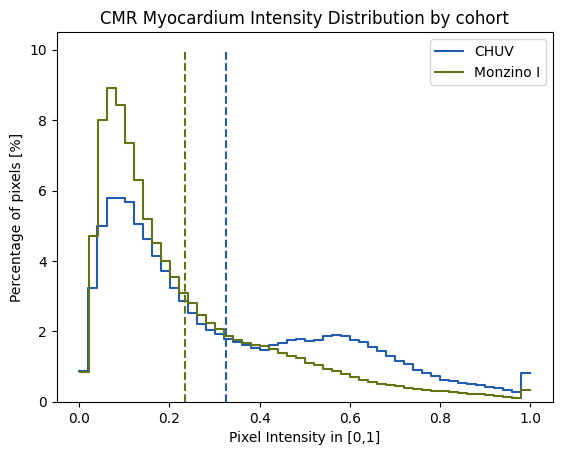

In [3]:
from scipy.ndimage import binary_erosion

data_path = r"C:\Users\JAVIER\OneDrive\Escritorio\ETH\Year 2\Spring 2023\Semester Project\scarnetwork-pytorch\Data"
for cohort_name, good_name, color in zip(["chuv", "monzinoII"], ["CHUV", "Monzino I"], ["#215CAF", "#627313"]):
    print(good_name)
    cohort = os.path.join(data_path, cohort_name)
    patients = [os.path.join(cohort, pat) for pat in os.listdir(cohort) if os.path.isdir(os.path.join(cohort, pat))]
    px_list = []
    for patient in patients:
        image = np.load(os.path.join(patient, "images.npy"))
        label = np.round(np.load(os.path.join(patient, "labels.npy"))[...,6]) 
        healthy = np.round(np.sum(np.load(os.path.join(patient, "labels.npy"))[...,[3,4]], axis=3) ) * image
        # myo = np.stack([binary_erosion(binary_erosion(label[i], iterations=2)*1)*image for i in range(len(image))])
        # myo = list(myo.flatten())
        myo = (image*label).flatten()
        myo = list(filter(lambda num: num != 0, myo))
        px_list.extend(myo)
    sns.histplot(px_list, stat="percent", label=good_name, color=color, element="step", fill=False, bins=50, alpha=1)
    plt.vlines(x=np.mean(px_list), ymin=0, ymax=10, colors=color, linestyles="--")
plt.title("CMR Myocardium Intensity Distribution by cohort")
plt.ylabel("Percentage of pixels [%]")
plt.xlabel("Pixel Intensity in [0,1]")
plt.legend()



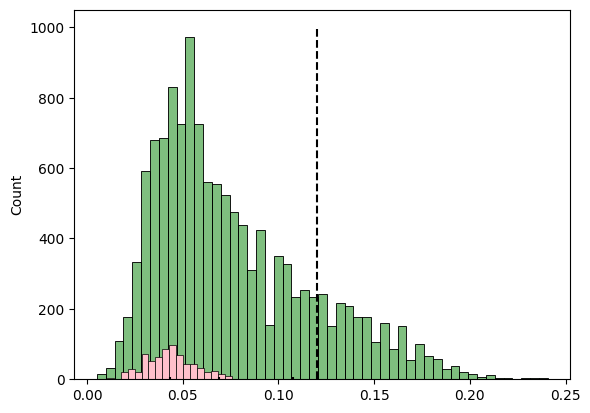

In [23]:
# healthy = list(filter(lambda num: num != 0, healthy.flatten()))
sns.histplot(myo, alpha=0.5, color="green")
sns.histplot(healthy, alpha=1., color="pink")
# plt.vlines(x=np.mean(healthy), ymin=0, ymax=1000, colors="k", linestyles="-")
# plt.vlines(x=np.mean(healthy)+np.std(healthy)*2, ymin=0, ymax=1000, colors="k", linestyles="--")
# plt.vlines(x=np.mean(healthy)+np.std(healthy)*5, ymin=0, ymax=1000, colors="k", linestyles="--")
plt.vlines(x=np.max(myo)/2, ymin=0, ymax=1000, linestyles="--", color="k")
plt.vlines(x=[np.mean(healthy), np.mean(healthy)+2*np.std(healthy),np.mean(healthy)+5*np.std(healthy)], ymin=0, ymax=6, linestyles="--", colors="k")



<AxesSubplot: ylabel='Percent'>

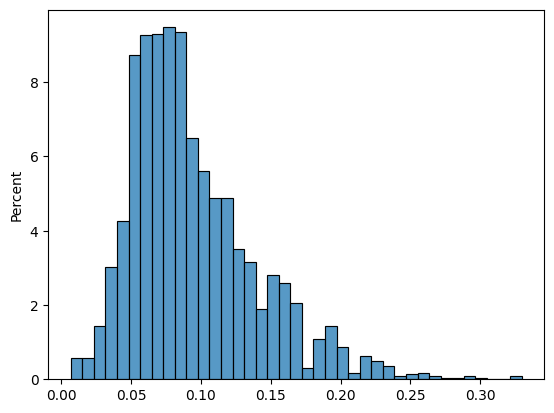

In [31]:
np.min(myo)

0.00657894741743803

In [18]:
a = [0,0,1,2,3]


[1, 2, 3]